In [1]:
!pip install pandas 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
!pip install kaggle


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [5]:
data = pd.read_csv('Ml Dataset.csv')

In [6]:
df = pd.DataFrame(data)

In [7]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [8]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [9]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area_1                     int64
Wilderness_Area_2                     int64
Wilderness_Area_3                     int64
Wilderness_Area_4                     int64
Soil_Type_1                           int64
Soil_Type_2                           int64
Soil_Type_3                           int64
Soil_Type_4                           int64
Soil_Type_5                           int64
Soil_Type_6                           int64
Soil_Type_7                           int64
Soil_Type_8                           int64
Soil_Type_9                     

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,...,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00,581012.00
mean,2959.37,155.66,14.10,269.43,46.42,2350.15,212.15,223.32,142.53,1980.29,...,0.09,0.08,0.00,0.00,0.00,0.00,0.03,0.02,0.02,2.05
std,279.98,111.91,7.49,212.55,58.30,1559.25,26.77,19.77,38.27,1324.20,...,0.29,0.27,0.05,0.06,0.01,0.02,0.16,0.15,0.12,1.40
min,1859.00,0.00,0.00,0.00,-173.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2809.00,58.00,9.00,108.00,7.00,1106.00,198.00,213.00,119.00,1024.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2996.00,127.00,13.00,218.00,30.00,1997.00,218.00,226.00,143.00,1710.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,3163.00,260.00,18.00,384.00,69.00,3328.00,231.00,237.00,168.00,2550.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,3858.00,360.00,66.00,1397.00,601.00,7117.00,254.00,254.00,254.00,7173.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,7.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area_1                   581012 non-null  int64
 11  Wilderness_Area_2                   581012 non-null 

In [12]:
df['Cover_Type'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [13]:
df['Cover_Type'].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

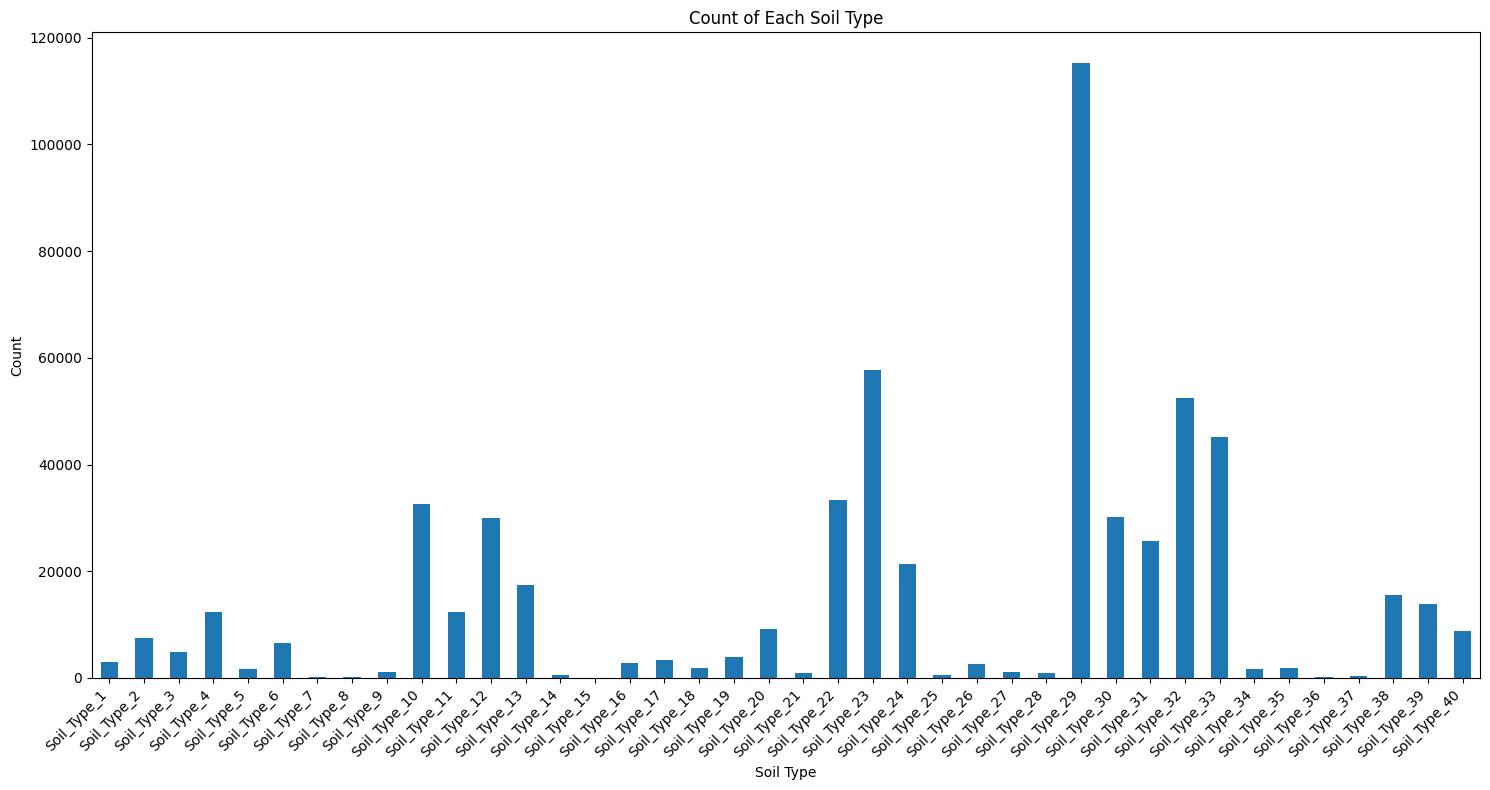

In [14]:
# Step 1: Select the columns that represent the soil types
# The columns are named Soil_Type_1 to Soil_Type_40
soil_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Step 2: Count the occurrences of each soil type
# Since the columns are binary (0 or 1), summing them gives the total count.
soil_counts = df[soil_columns].sum()

# Step 4: Create the bar chart
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
soil_counts.plot(kind='bar')
plt.title('Count of Each Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better fit
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Step 5: Display the plot
plt.show()

# If you prefer to save the plot as a file instead of displaying it
# plt.savefig('soil_type_counts.png')

In [15]:
#Removing columns
df.drop(columns = ['Soil_Type_7', 'Soil_Type_8', 'Soil_Type_14','Soil_Type_15','Soil_Type_25','Soil_Type_36','Soil_Type_37'], inplace = True)

In [16]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29',
       'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
       'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_38', 'Soil_Type_39',
       'Soil_Type_40', 'Cover_Type'],
      dtype='object')

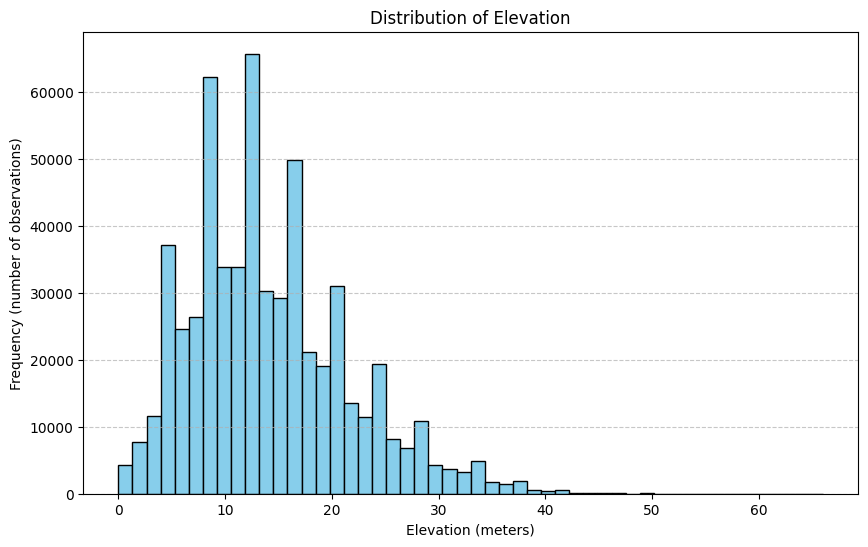

In [17]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a histogram of the 'Elevation' column
plt.figure(figsize=(10, 6))
plt.hist(df['Slope'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Elevation')
plt.xlabel('Elevation (meters)')
plt.ylabel('Frequency (number of observations)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

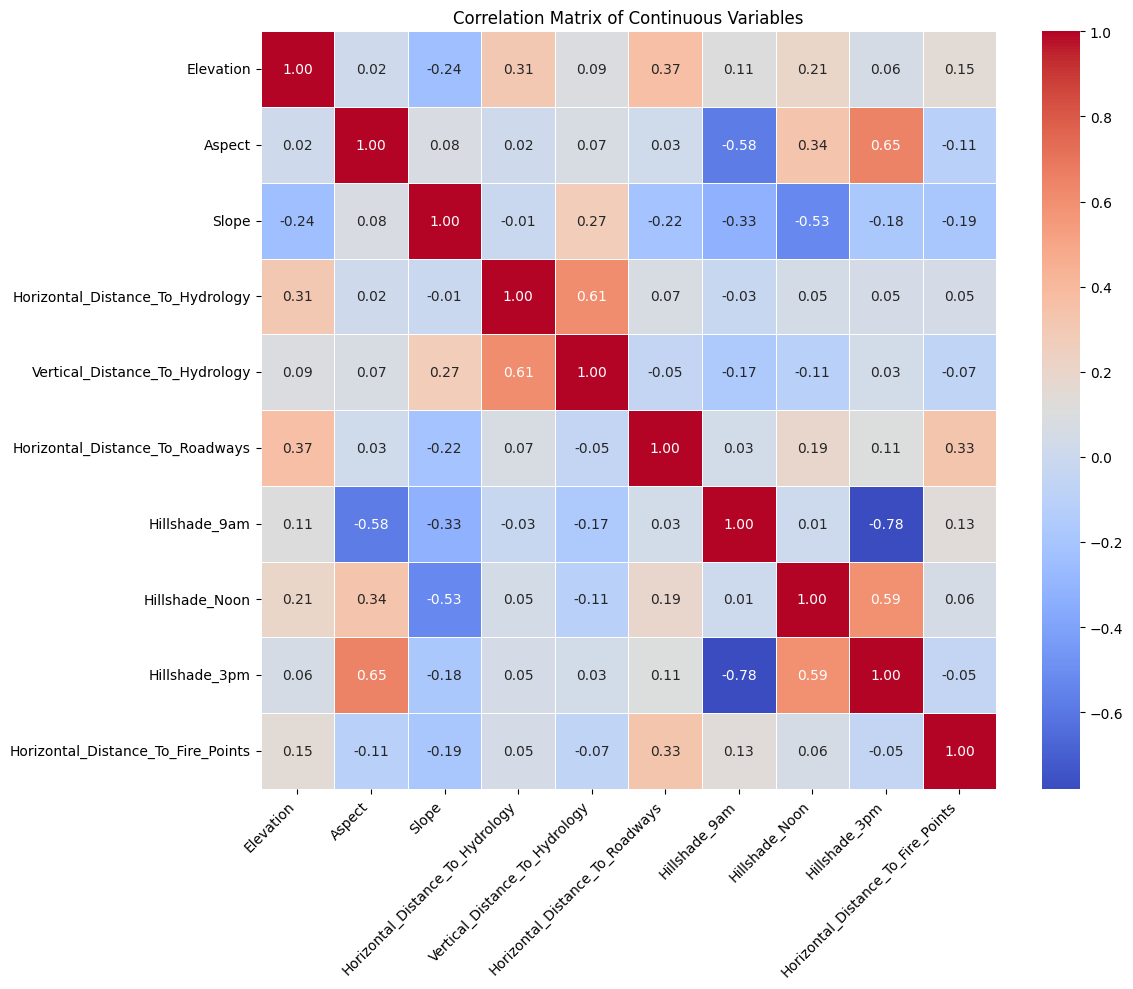

In [18]:
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Create the correlation matrix
correlation_matrix = df[continuous_cols].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10}, linewidths=.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

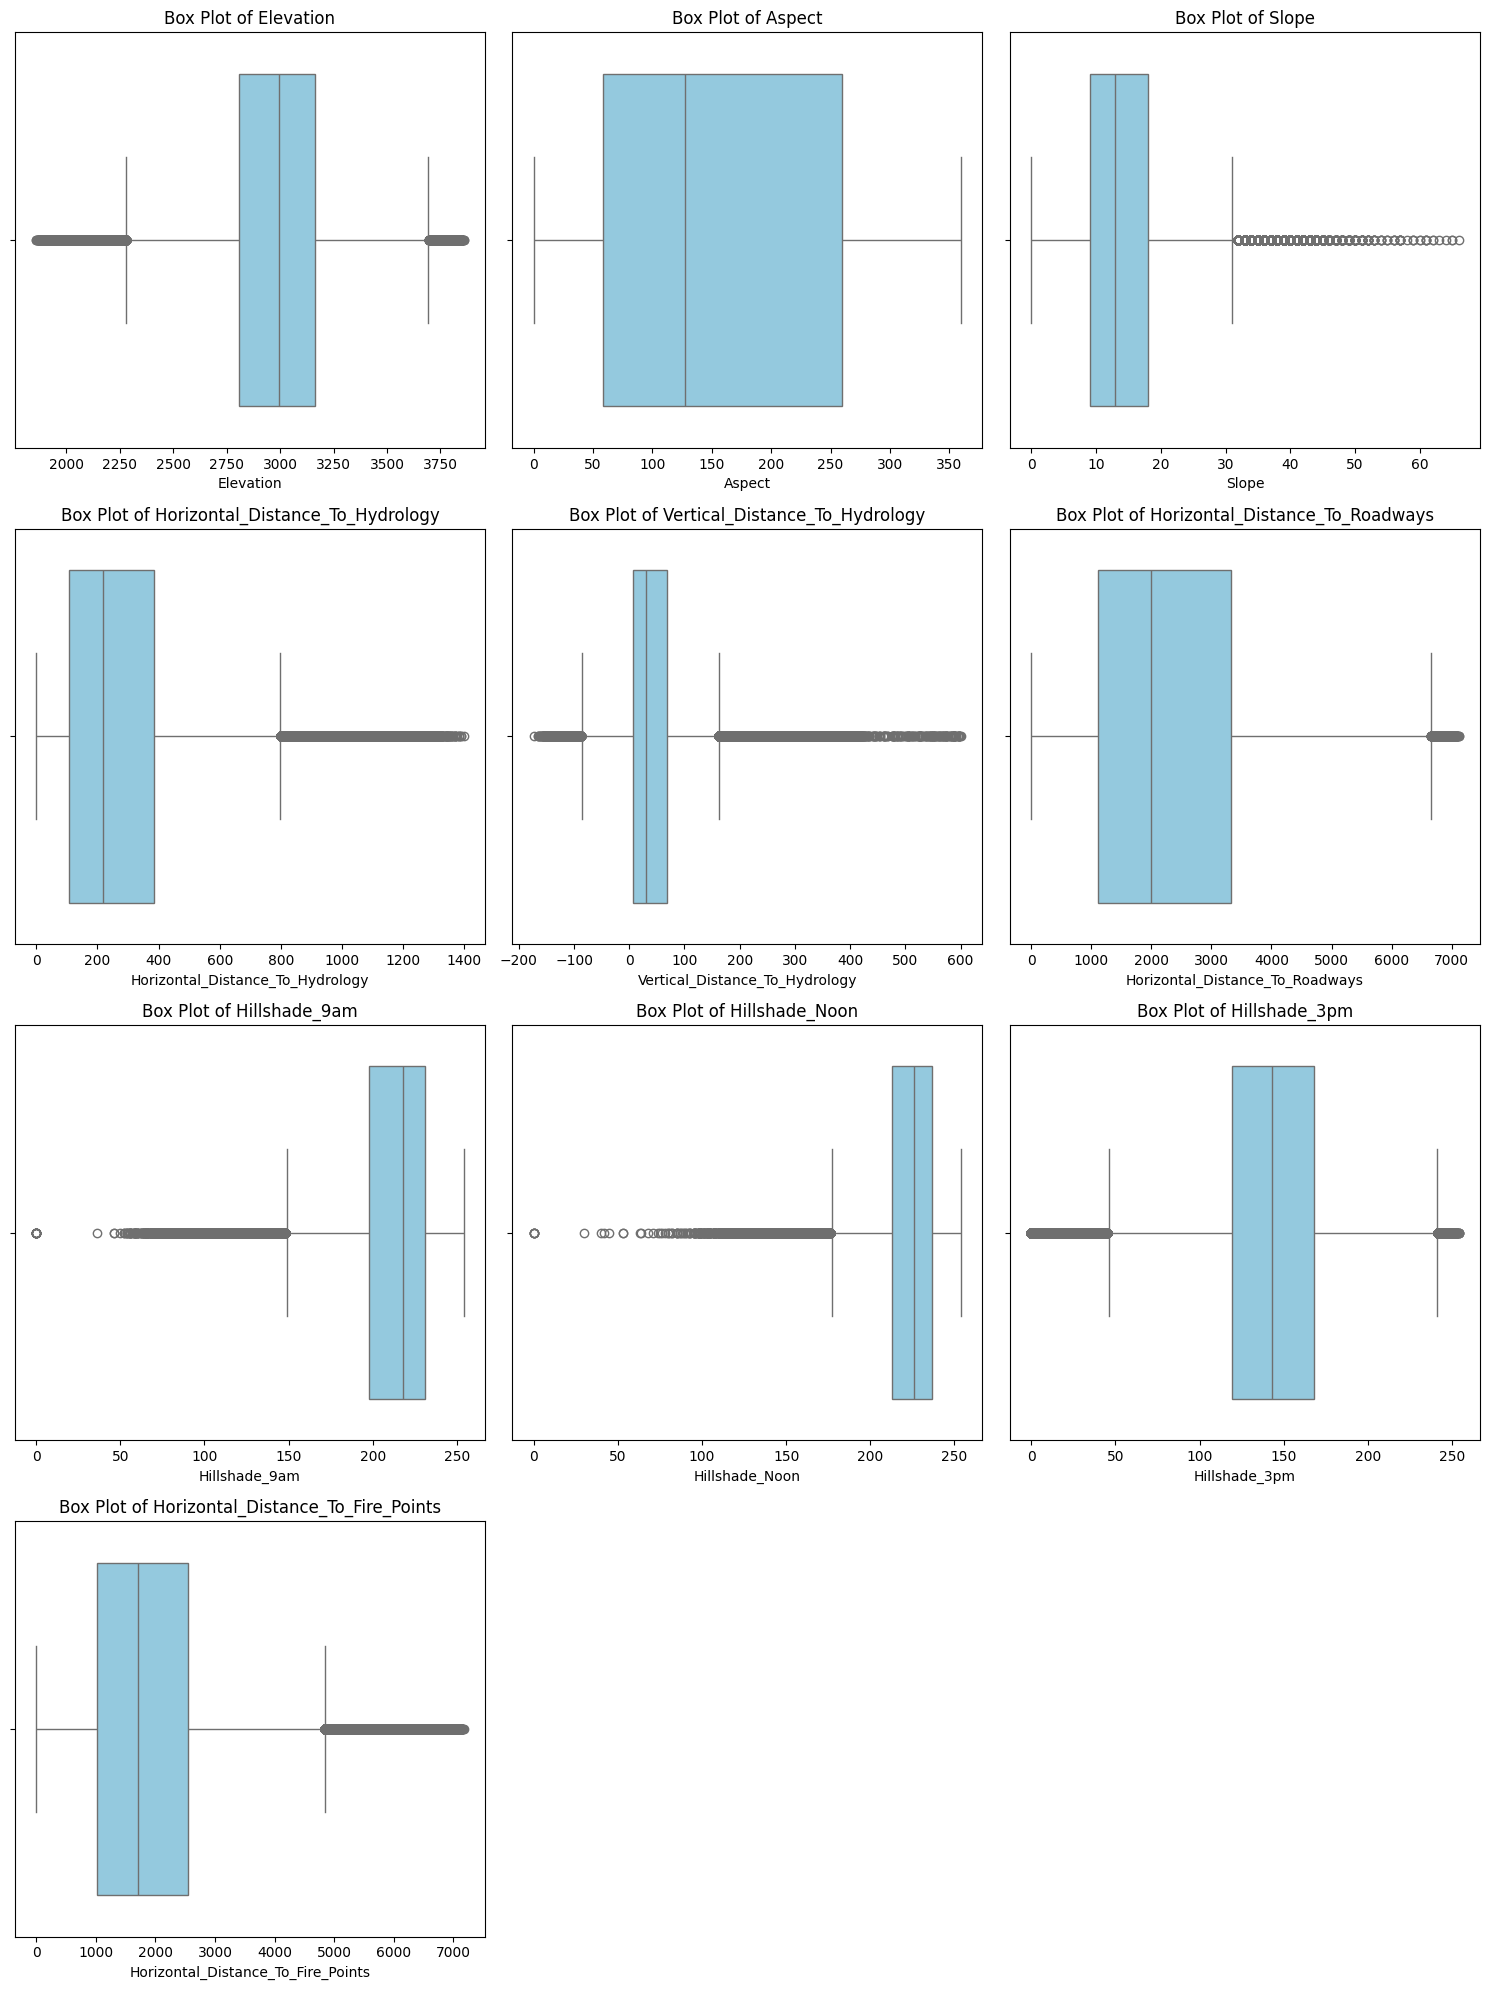

In [19]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a box plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

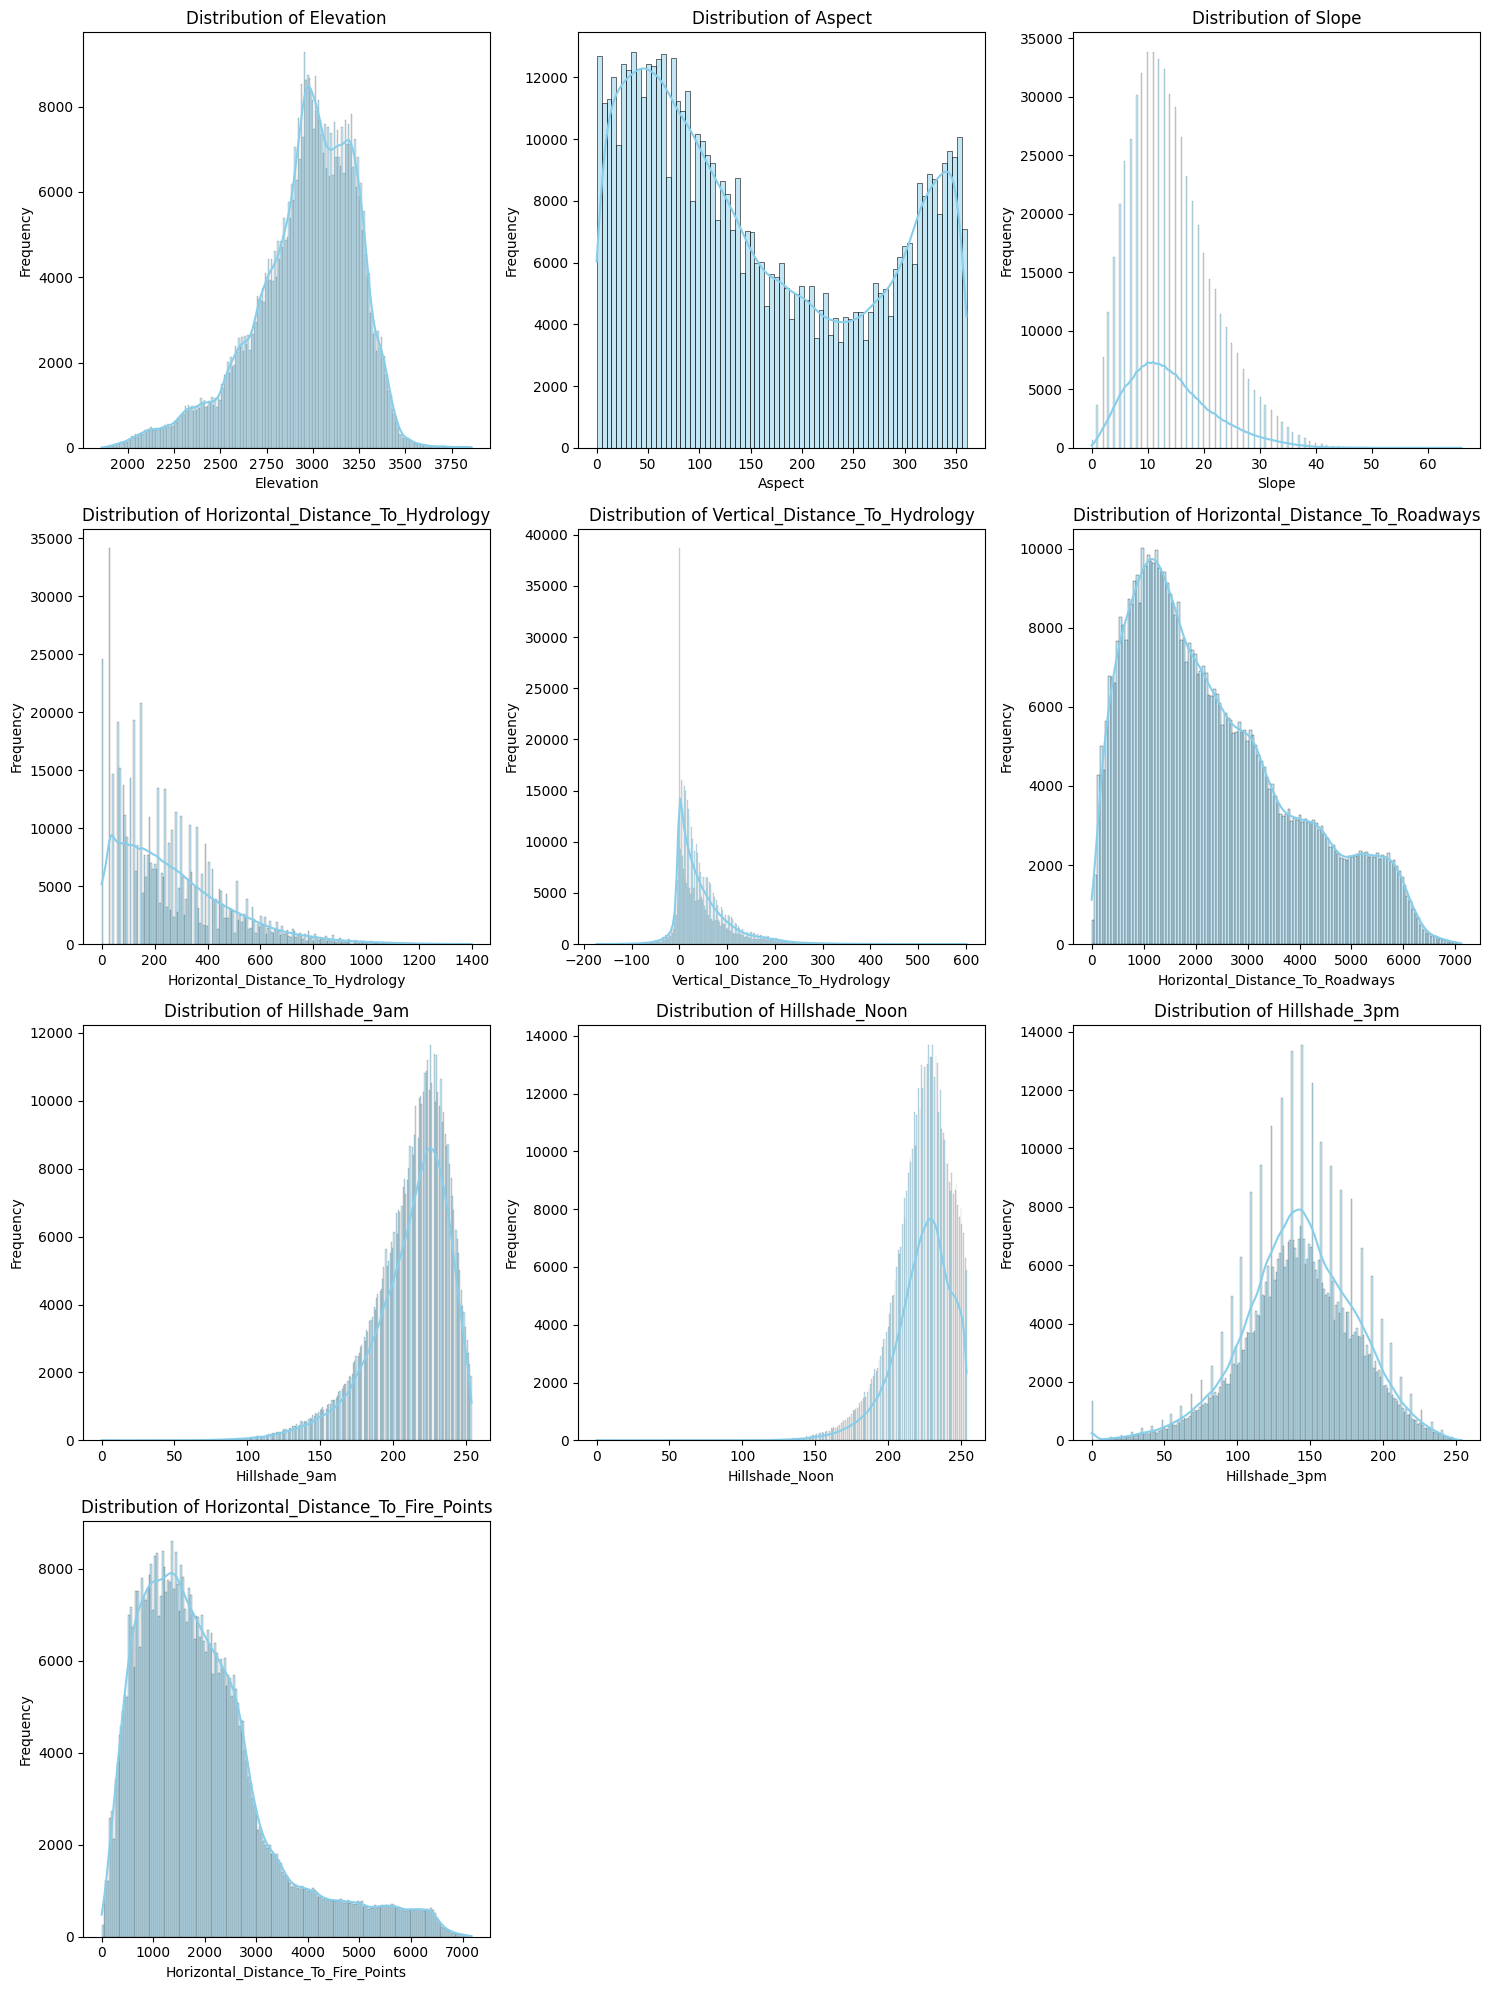

In [20]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a distribution plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

In [21]:
# List of continuous columns to clean
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Create a copy of the DataFrame to work with
df1 = df.copy()

# Loop through each continuous column
for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Original data shape:", df.shape)
print("Data shape after removing outliers:", df.shape)

Original data shape: (461500, 48)
Data shape after removing outliers: (461500, 48)


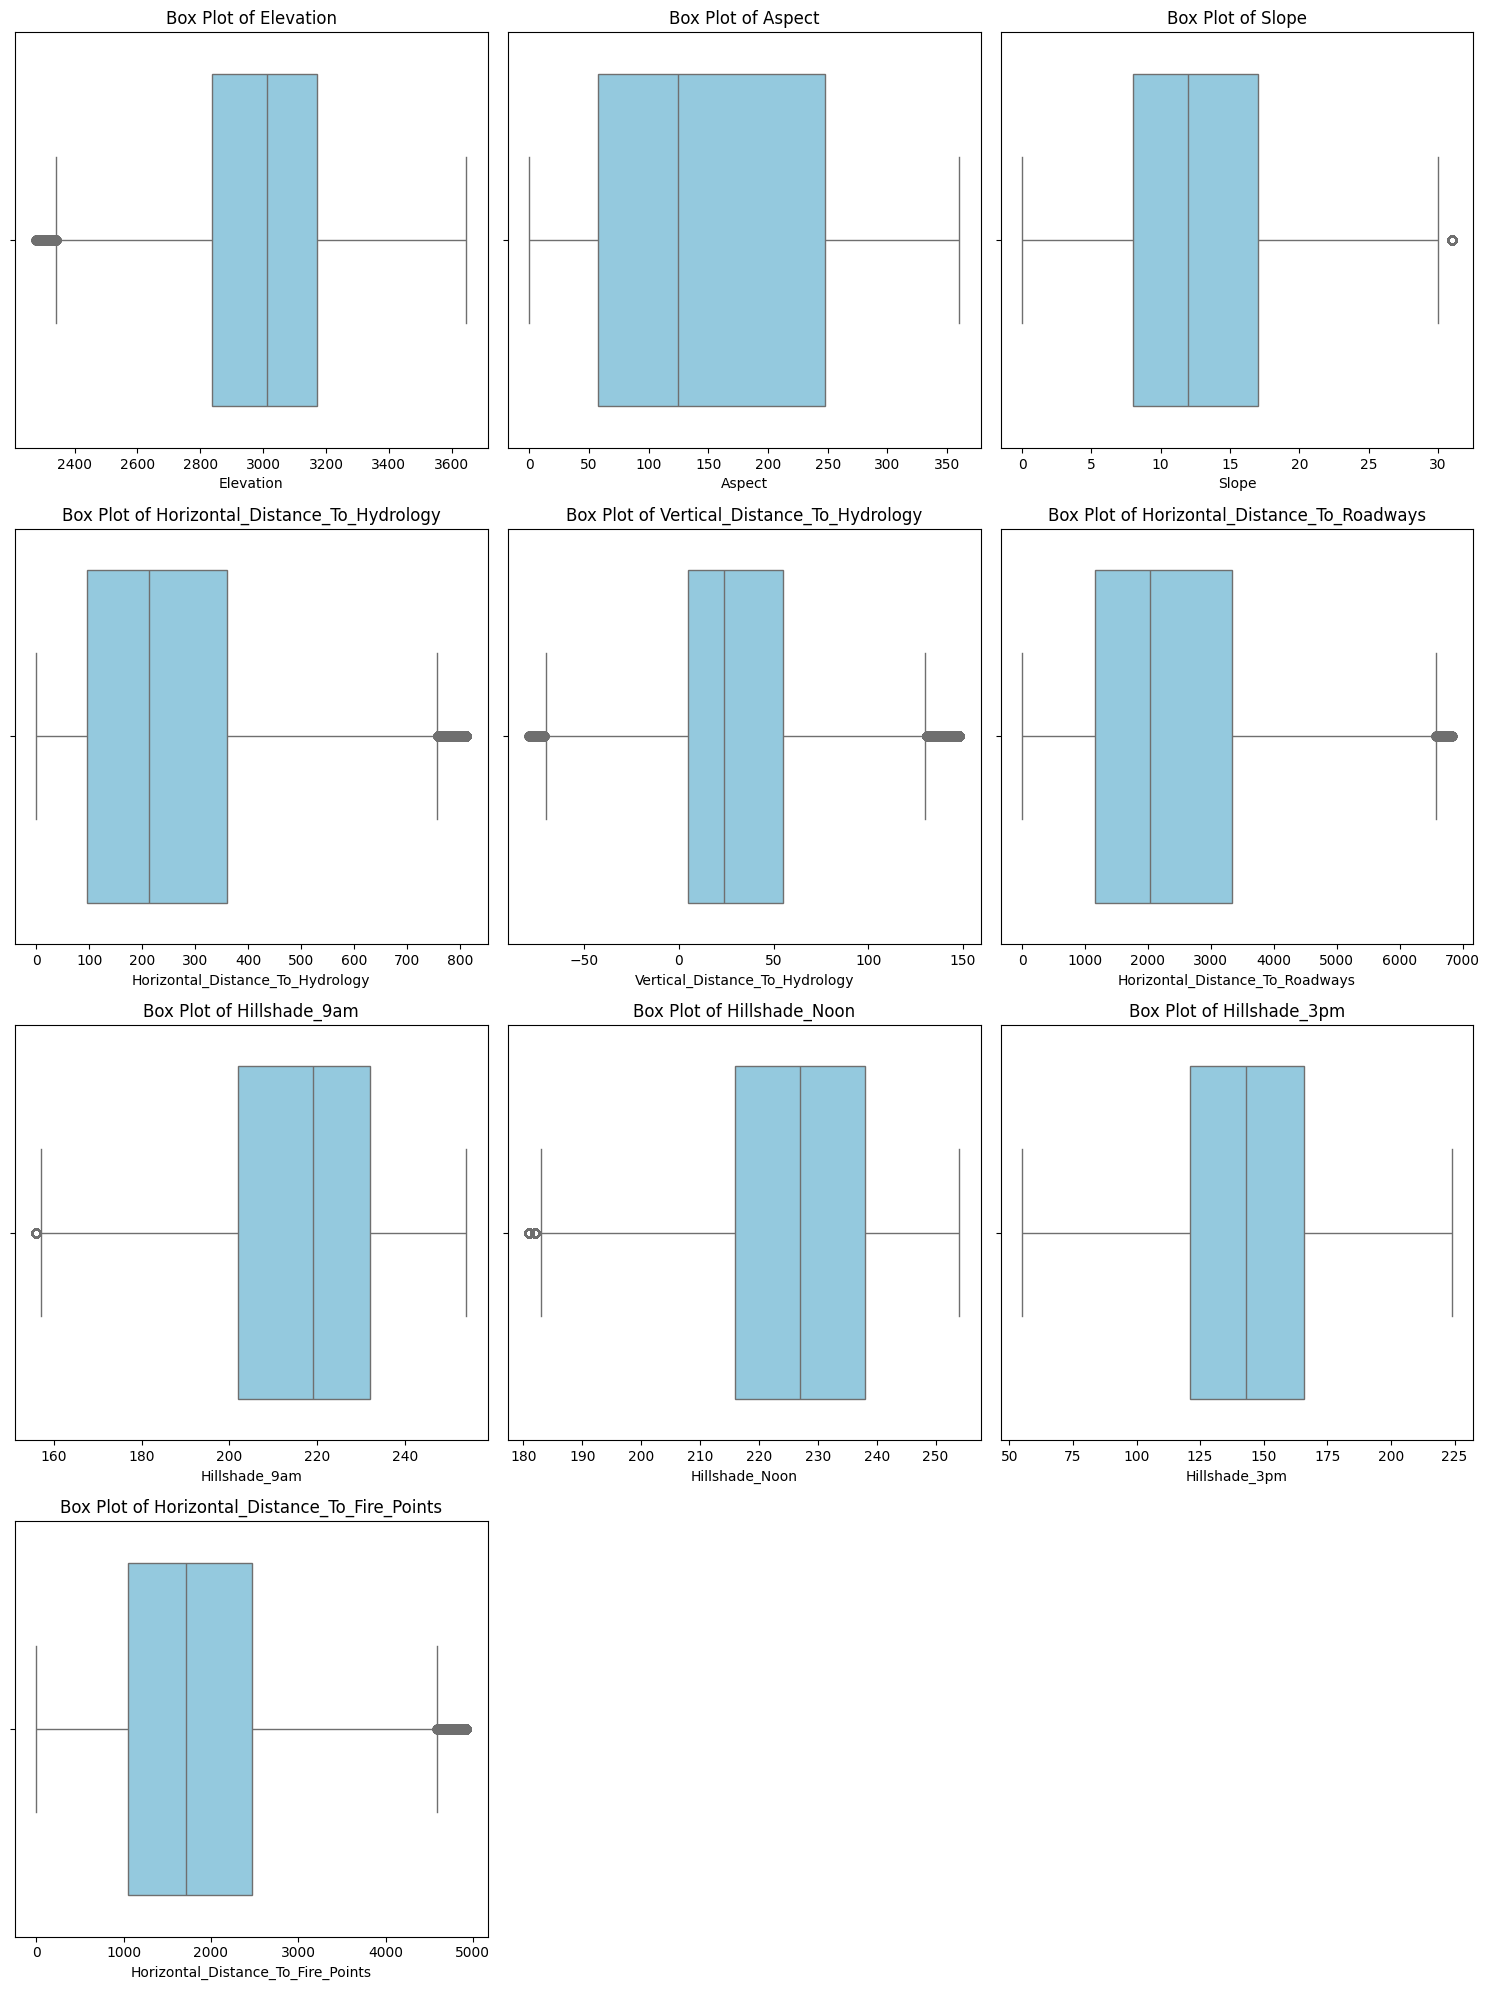

In [22]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a box plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

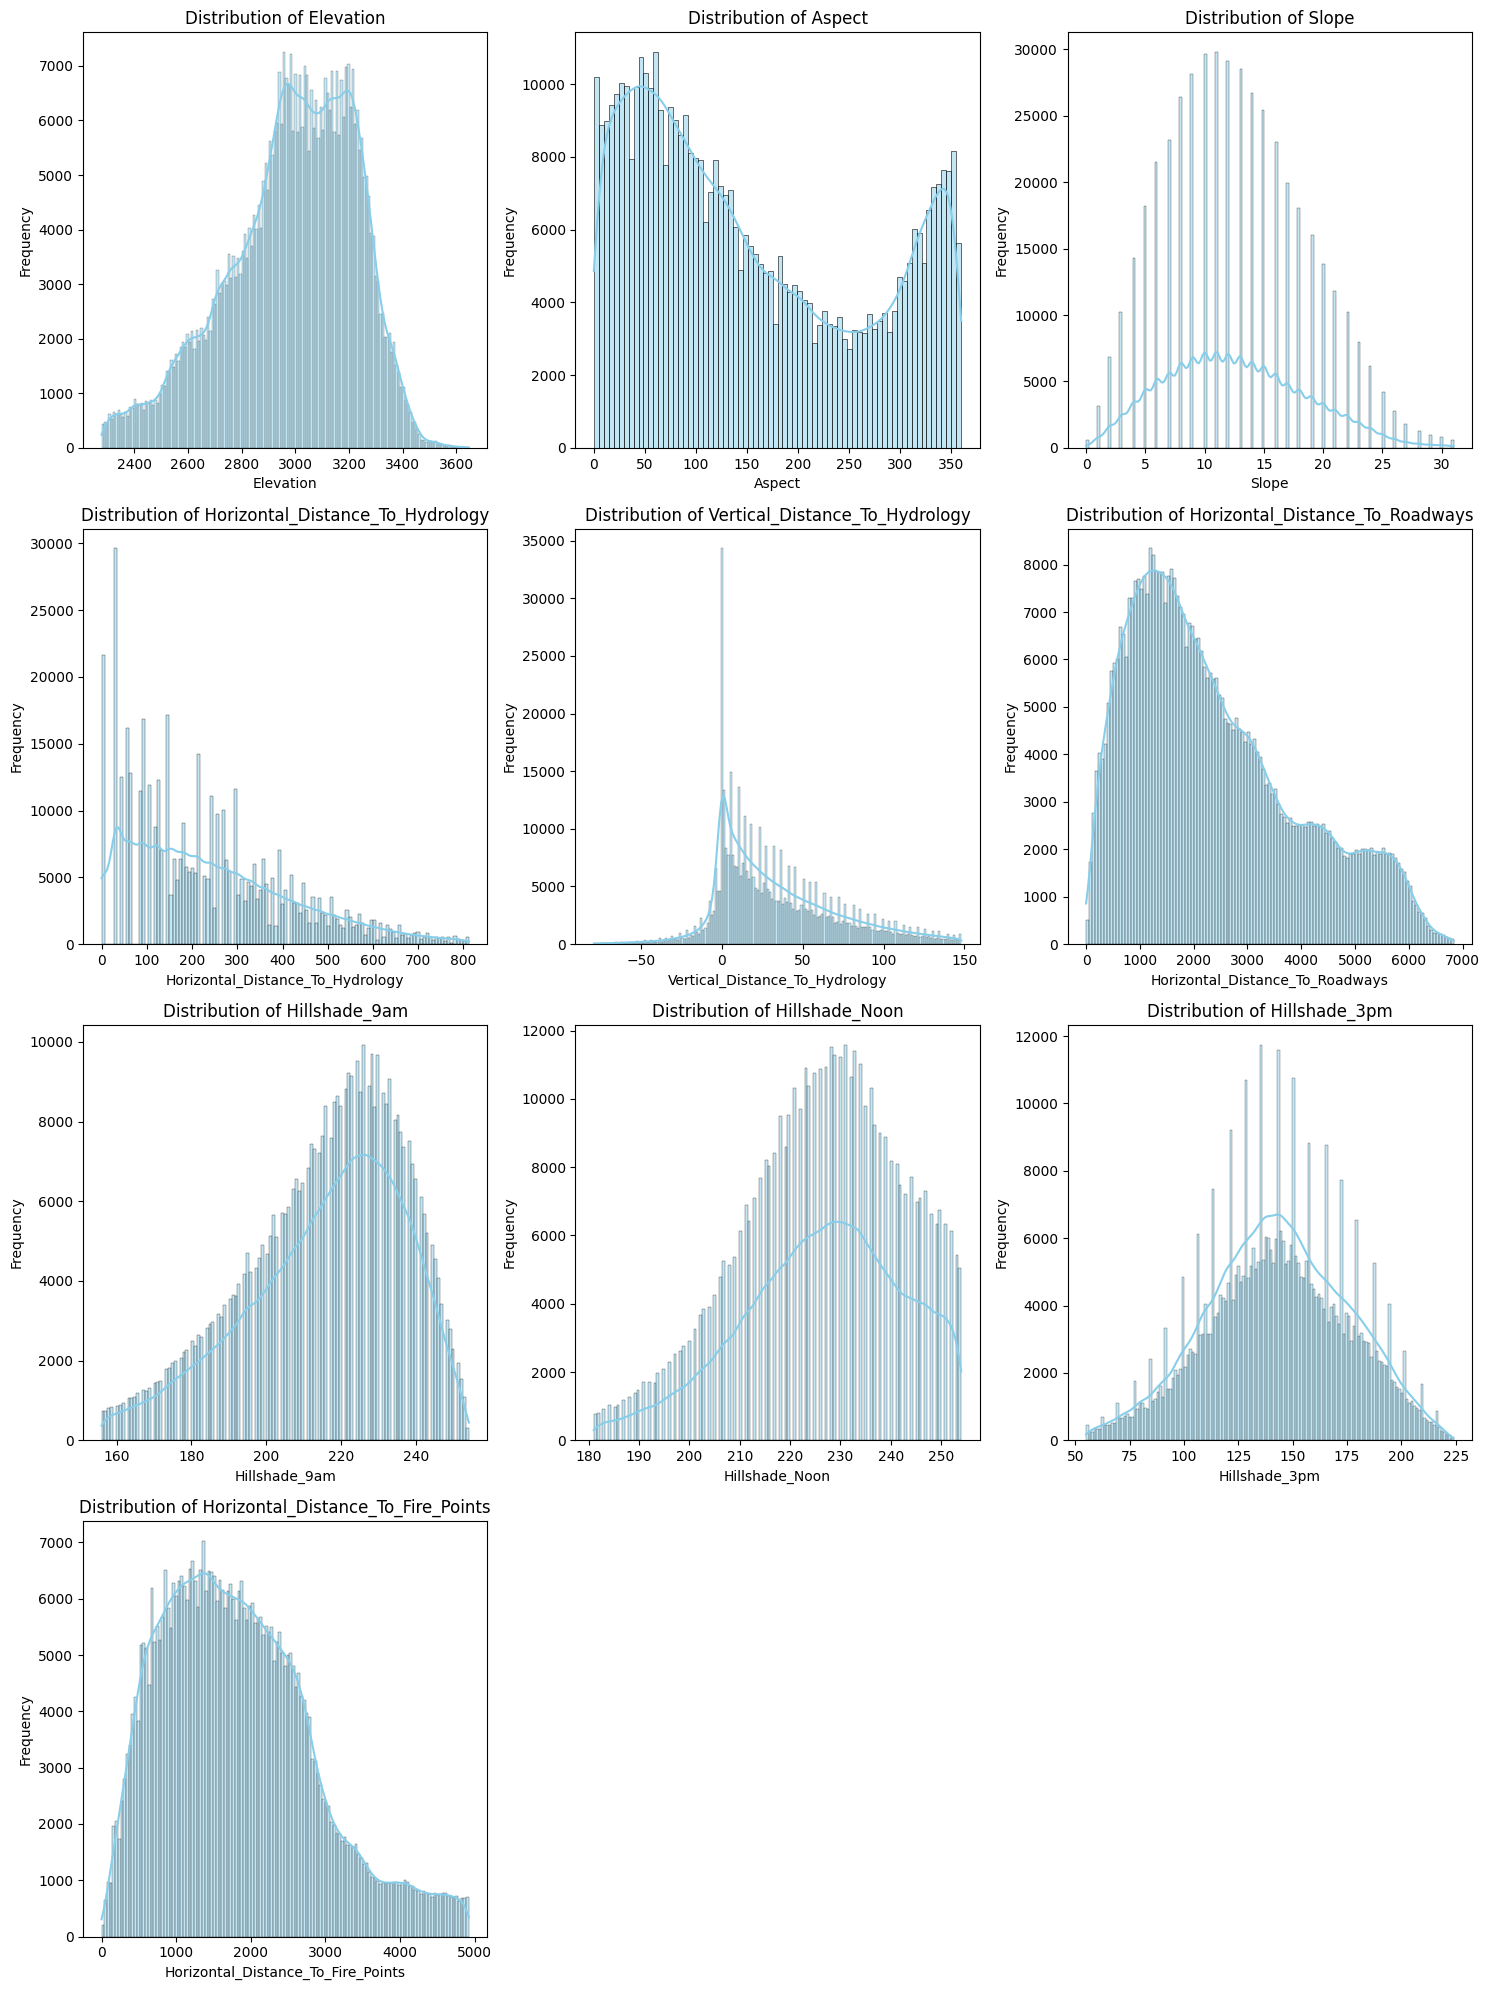

In [23]:
# List of continuous columns to plot
continuous_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Set up the subplot grid
num_plots = len(continuous_cols)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create a distribution plot
for i, col in enumerate(continuous_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

Percentage for default

Cover_Type
2   49.48
1   38.87
3    4.23
7    3.31
6    2.38
5    1.59
4    0.14
Name: proportion, dtype: float64


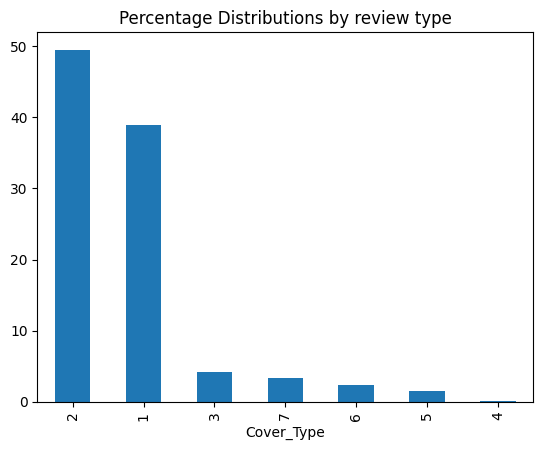

In [24]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline


print('Percentage for default\n')
print(round(df.Cover_Type.value_counts(normalize=True)*100,2))
round(df.Cover_Type.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [25]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
11,2886,151,11,371,26,5253,234,240,136,4051,...,1,0,0,0,0,0,0,0,0,2
21,2880,209,17,216,30,4986,206,253,179,4323,...,1,0,0,0,0,0,0,0,0,2
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,2
35,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,0,2
61,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [26]:
X = df.drop(['Cover_Type'], axis=1)
y = df['Cover_Type']

activity_count = y.value_counts()
activity_count

Cover_Type
2    228368
1    179390
3     19501
7     15279
6     10967
5      7326
4       669
Name: count, dtype: int64

<Axes: ylabel='count'>

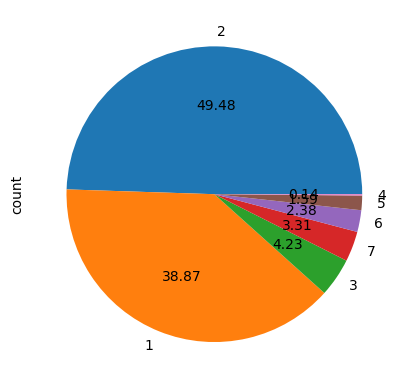

In [27]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

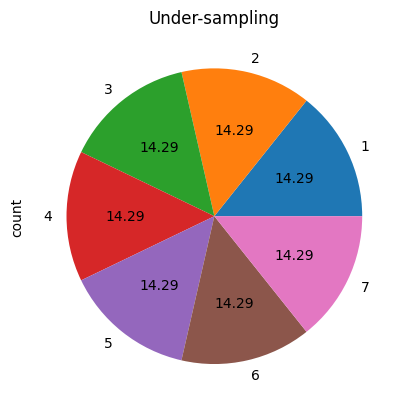

In [28]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X, y)


ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [47]:
from collections import Counter

print(Counter(y_train_rus))
print(y_train_rus.value_counts())


Counter({1: 669, 2: 669, 3: 669, 4: 669, 5: 669, 6: 669, 7: 669})
Cover_Type
1    669
2    669
3    669
4    669
5    669
6    669
7    669
Name: count, dtype: int64


In [29]:
x = df.drop("Cover_Type",axis=1)
y = df['Cover_Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
print (x_train.shape)
print (x_test.shape)


(230750, 15)
(230750, 15)


In [53]:
print(y_train.unique())            # Shows unique values
print(len(y_train.unique()))       # Shows the count of unique values
print(y_train.unique().sum())      # Sums the unique values (for numerical labels only)


[3 1 2 7 6 5 4]
7
28


Feature Importances:
Elevation                            0.32
Horizontal_Distance_To_Roadways      0.15
Horizontal_Distance_To_Fire_Points   0.14
Horizontal_Distance_To_Hydrology     0.05
Wilderness_Area_3                    0.04
Vertical_Distance_To_Hydrology       0.04
Aspect                               0.03
Hillshade_9am                        0.03
Hillshade_Noon                       0.02
Hillshade_3pm                        0.02
Wilderness_Area_1                    0.02
Soil_Type_32                         0.02
Slope                                0.02
Soil_Type_39                         0.01
Soil_Type_38                         0.01
Soil_Type_35                         0.01
Wilderness_Area_2                    0.01
Soil_Type_23                         0.01
Soil_Type_31                         0.00
Soil_Type_33                         0.00
Soil_Type_40                         0.00
Soil_Type_10                         0.00
Soil_Type_29                         0.00
Soil_Type_17 

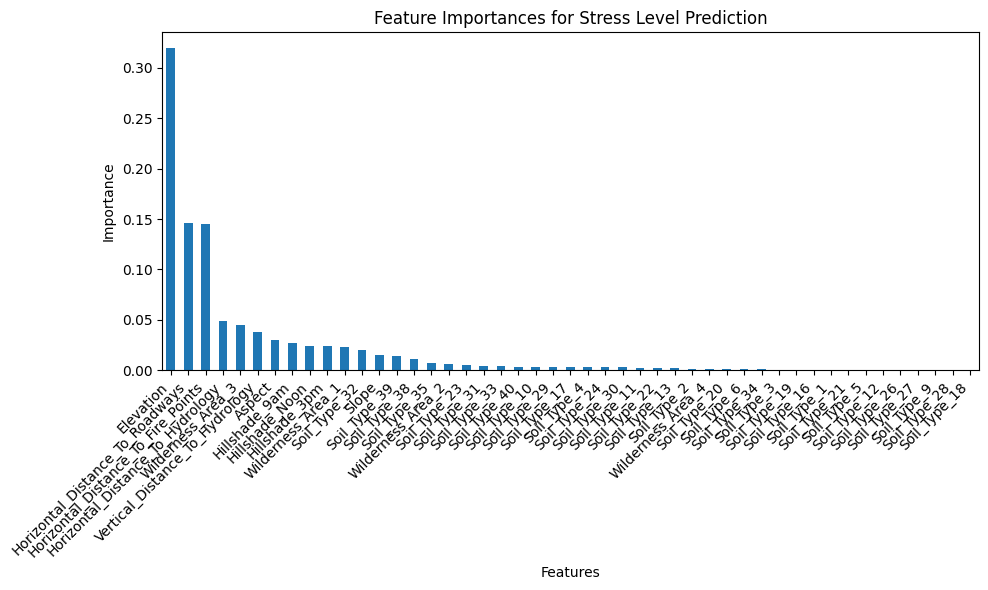

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances for Stress Level Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
x = df[['Elevation','Aspect','Slope','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Vertical_Distance_To_Hydrology','Wilderness_Area_3','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Wilderness_Area_1','Soil_Type_32','Soil_Type_39','Soil_Type_35','Soil_Type_38']]
y = df['Cover_Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
scaler= MinMaxScaler()
x_train=scaler.fit_transform(x_train) #(fit_transform runs & takes data from scaler = minmaxscaler(), whereas transform takes the already stored data in scaler = minmaxscaler(). we generally need same min & max value in the train as well as test dataset hence fit_transform 1st and only transform 2nd)
x_test=scaler.transform(x_test)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=123)


clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

display(models) 

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 230750, number of used features: 15
[LightGBM] [Info] Start training from score -0.947119
[LightGBM] [Info] Start training from score -0.703296
[LightGBM] [Info] Start training from score -3.162121
[LightGBM] [Info] Start training from score -6.520145
[LightGBM] [Info] Start training from score -4.141143
[LightGBM] [Info] Start training from score -3.715893
[LightGBM] [Info] Start training from score -3.406891


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.94,0.83,None,0.94,31.67
DecisionTreeClassifier,0.90,0.82,None,0.90,4.83
RandomForestClassifier,0.93,0.80,None,0.93,90.36
ExtraTreesClassifier,0.92,0.78,None,0.92,63.28
LGBMClassifier,0.83,0.74,None,0.83,16.14
KNeighborsClassifier,0.88,0.73,None,0.88,653.15
ExtraTreeClassifier,0.79,0.65,None,0.79,1.09
NearestCentroid,0.48,0.56,None,0.52,0.64
SVC,0.77,0.52,None,0.77,5726.98


In [37]:
import pickle

# Assuming 'models' is a DataFrame from LazyPredict containing the trained models
# and you want to save the best performing model based on accuracy
best_model_name = models.index[0]  # Get the name of the best model
model = clf.models[best_model_name]  # Access the actual trained model

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [34]:
from sklearn.model_selection import cross_val_score

# Train and evaluate using cross-validation
neigh = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(neigh, x, y, cv=5, scoring='accuracy')
print(scores) 

[0.46657638 0.49934995 0.46854821 0.49349946 0.51329361]


In [55]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
11,2886,151,11,371,26,5253,234,240,136,4051,...,1,0,0,0,0,0,0,0,0,2
21,2880,209,17,216,30,4986,206,253,179,4323,...,1,0,0,0,0,0,0,0,0,2
27,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,2
35,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,0,2
61,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


LOGISTIC REGRESSION 

[2]


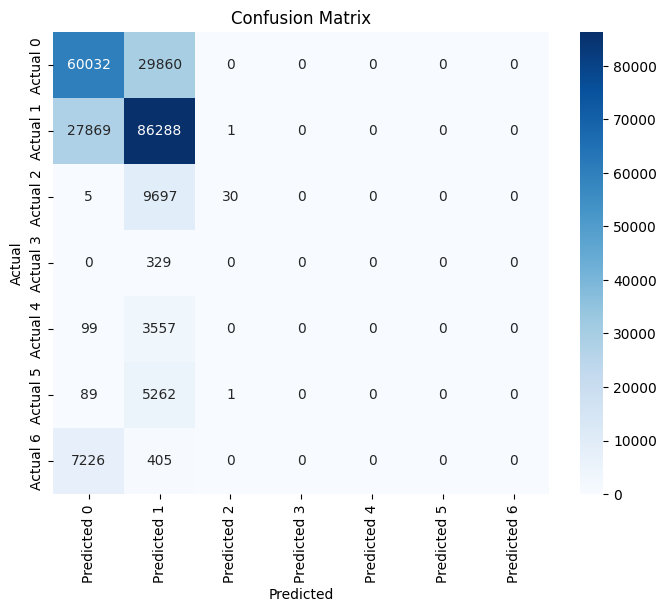

In [ ]:
x = df[['Elevation','Aspect','Slope','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Vertical_Distance_To_Hydrology','Wilderness_Area_3','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Wilderness_Area_1','Soil_Type_32','Soil_Type_39','Soil_Type_35','Soil_Type_38']]
y = df['Cover_Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(x_train,y_train)

print(mod.predict([[2000,200,20,100,150,30,1,200,200,200,1,0,0,0,0]]))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = mod.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1','Predicted 2','Predicted 3','Predicted 4','Predicted 5','Predicted 6'], yticklabels=['Actual 0', 'Actual 1','Actual 2','Actual 3','Actual 4','Actual 5','Actual 6'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

### 0 na vela vittu povan 1 na velaila irupan itha vachi f1 score paarkanuum

              precision    recall  f1-score   support

           1       0.63      0.67      0.65     89892
           2       0.64      0.76      0.69    114158
           3       0.94      0.00      0.01      9732
           4       0.00      0.00      0.00       329
           5       0.00      0.00      0.00      3656
           6       0.00      0.00      0.00      5352
           7       0.00      0.00      0.00      7631

    accuracy                           0.63    230750
   macro avg       0.31      0.20      0.19    230750
weighted avg       0.60      0.63      0.59    230750



In [62]:
 # Train and evaluate using cross-validation
neigh = LogisticRegression()
scores = cross_val_score(neigh, x, y, cv=5, scoring='accuracy')
print(scores)

[0.60576381 0.66637053 0.5691441  0.64578548 0.59530878]


DECISION TREE 

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.919284940411701
              precision    recall  f1-score   support

           1       0.92      0.92      0.92     35749
           2       0.93      0.93      0.93     45708
           3       0.88      0.87      0.87      3875
           4       0.68      0.68      0.68       146
           5       0.75      0.75      0.75      1467
           6       0.82      0.83      0.83      2223
           7       0.94      0.93      0.93      3132

    accuracy                           0.92     92300
   macro avg       0.85      0.85      0.85     92300
weighted avg       0.92      0.92      0.92     92300

[[32992  2526     3     0    49     9   170]
 [ 2565 42527   188     5   284   113    26]
 [    8   207  3361    25    25   249     0]
 [    0     1    27   100     0    18     0]
 [   40   296    20     0  1103     8     0]
 [   15   122   212    17     5  1852     0]
 [  186    31     0     0     0     0  2915]]


KNN


RANDOM FOREST 


In [76]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Performance:
Accuracy: 0.9239003250270856

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.93      0.93     35749
           2       0.93      0.94      0.93     45708
           3       0.88      0.89      0.89      3875
           4       0.85      0.60      0.70       146
           5       0.90      0.59      0.71      1467
           6       0.86      0.80      0.83      2223
           7       0.98      0.91      0.94      3132

    accuracy                           0.92     92300
   macro avg       0.90      0.81      0.85     92300
weighted avg       0.92      0.92      0.92     92300


Confusion Matrix:
 [[33348  2311     2     0    19     5    64]
 [ 2517 42900   148     0    63    72     8]
 [    6   210  3455     8     7   189     0]
 [    0     0    43    87     0    16     0]
 [   37   537    25     0   863     5     0]
 [   11   194   238     7     5  1768     0]
 [  260    17     0  

XG BOOST


In [78]:
# Assuming X, y are already defined and preprocessed

# Split data (if not already split)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Initialize and train the XGBoost Classifier
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(x_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_model.predict(x_test)

# Decode the predicted labels back to original strings for the classification report and confusion matrix
y_pred_decoded = le.inverse_transform(y_pred_xgb)


# Evaluate the model
print("XGBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_decoded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_decoded))

XGBoost Classifier Performance:
Accuracy: 0.8569014084507042

Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.84      0.85     35749
           2       0.86      0.88      0.87     45708
           3       0.86      0.86      0.86      3875
           4       0.85      0.73      0.79       146
           5       0.87      0.45      0.59      1467
           6       0.81      0.81      0.81      2223
           7       0.95      0.90      0.93      3132

    accuracy                           0.86     92300
   macro avg       0.87      0.78      0.81     92300
weighted avg       0.86      0.86      0.86     92300


Confusion Matrix:
 [[30090  5512     3     0    18     6   120]
 [ 4912 40279   279     0    77   147    14]
 [    1   271  3345    11     1   246     0]
 [    0     0    30   106     0    10     0]
 [   11   761    29     0   661     5     0]
 [    4   211   211     7     0  1790     0]
 [  296    15     0     0  

BEST MODEL 
KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
mod = KNeighborsClassifier(n_neighbors=5)
mod.fit(x_train,y_train)


y_pred=mod.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95     35749
           2       0.95      0.96      0.96     45708
           3       0.92      0.93      0.93      3875
           4       0.92      0.62      0.74       146
           5       0.89      0.81      0.85      1467
           6       0.91      0.87      0.89      2223
           7       0.97      0.96      0.96      3132

    accuracy                           0.95     92300
   macro avg       0.93      0.87      0.90     92300
weighted avg       0.95      0.95      0.95     92300



In [82]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
# Define hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# 1. **Grid Search CV** (Exhaustive Search for Best Hyperparameters)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
# Get the best parameters
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best accuracy from Grid Search CV:", grid_search.best_score_)
# Train with best parameters
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(x_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))


Best parameters from Grid Search CV: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy from Grid Search CV: 0.954100758396533

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96     35749
           2       0.96      0.97      0.96     45708
           3       0.94      0.94      0.94      3875
           4       0.88      0.67      0.76       146
           5       0.90      0.85      0.87      1467
           6       0.90      0.90      0.90      2223
           7       0.97      0.96      0.96      3132

    accuracy                           0.96     92300
   macro avg       0.93      0.89      0.91     92300
weighted avg       0.96      0.96      0.96     92300



In [83]:
import pickle

with open('best_knn_model.pkl', 'wb') as f:
    pickle.dump(best_model_grid, f)


In [84]:
with open('best_knn_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [90]:
loaded_model.predict([[2, 45, 10, 8, 710, 0, 0, 220, 232, 151, 0, 0, 1, 1, 1]])

array([3])